<a href="https://colab.research.google.com/github/neto-riga/Metodos_Numericos/blob/main/Ejercicio2_Biseccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Bisección
#### Martínez Venegas Raúl
#### Rivera Gálvez Ernesto
---

Determina el coeficiente de rozamiento c, necesario para que un paracaidista de masa *m* = 68.1 tenga una velocidad de 40 $m/s$ después de una caída libre de *t* = 10s. La aceleración de la gravedad es de 9.8 $m/s^2$.

Este problema se puede resolver determinando la raíz de la ecuación:

$$ f(c) =\frac{gm}{c}\left(1-e^{-\left(\frac{c}{m}\right)t}\right)-v $$

(Segunda Ley de Newton)
Donde: 



> *t* = tiempo

> *v* = velocidad

> *m* = masa


> *g* = aceleración de la gravedad


 $$ f(c) =\frac{(9.8)(68.1)}{c}\left(1-e^{-\left(\frac{c}{68.1}\right)10}\right)-40 $$ 
 

Resolver el problema, elegir un intervalo,
encontrar una raíz, con tolerancia 0.00005 en el error relativo.






In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
import seaborn as sns
from tabulate import tabulate

In [ ]:
def f(x):
  return (9.8*68.1)*(1-math.pow(math.e,-(x*10/68.1)))/x-40


Realizamos la gráfica de la función para darnos idea del intervalo que elegiremos para iniciar el método de bisección

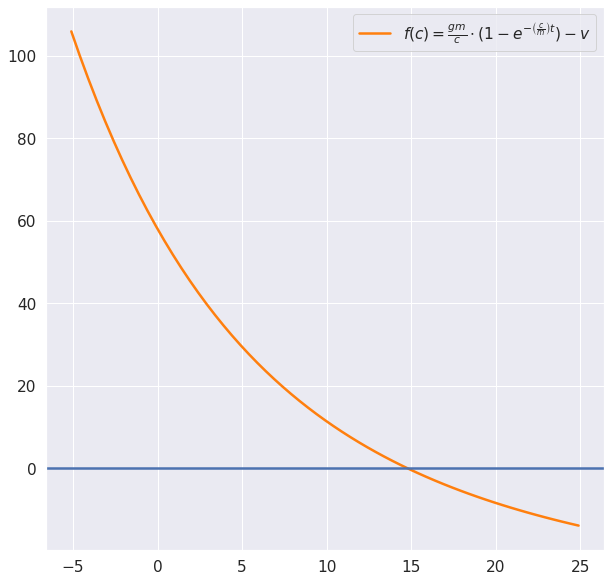

In [ ]:
sns.set_theme()
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 2.5})

x_axis=np.arange(-5.1,25,0.5)

plt.figure(figsize=(10, 10))
plt.plot(x_axis, [f(x) for x in x_axis], 'tab:orange', label=r'$f(c)=\frac{gm}{c} \cdot \left(1-e^{-\left(\frac{c}{m}\right)t}\right)-v$')
plt.axhline(y=0)

plt.legend()

Primero elegimos el intervalo inicial con *f(a)* y *f(b)* de signos opuestos para obtener *p* tal que  *a < p < b* tal que *f(p) = 0*. Como obeservamos en la gráfica, la raíz se encuentra entre *14* y *16*, así tomamos los valores iniciales de *a=14* y *b=16*

In [ ]:
a = [14.0]
b = [16.0]
p = (a[0]+b[0])/2
solucion = [p]
err_abs = ['NA']
i=int(0)
iteraciones = [i]
err_rel = [1.0]

Ahora implementamos el método de la bisección. Colocamos la tolerancia del error en la condicion del *while* para realizar el proceso hasta que se compla. Para que el método funcione, verificamos $$f(a)*f(b)<0$$ Es decir, que tengan signos contrarios.  Si se cumple, entonces $$b\leftarrow	p$$ $$a\leftarrow	 a$$ De lo contrario $$a\leftarrow	 p$$ $$b \leftarrow	 b$$ Obtenemos el punto medio para que, de ser necesario repitamos el proceso

$$p = \frac{a+b}{2}$$ Adjuntamos a *p* nuestra lista de soluciones además de contar las iteraciones. Calculamos el *error relativo*, el cual será utilizado como criterio para detener el método. $$E_{a}=|x_{n}-x_{n-1}|$$ Obtenemos también el *error relativo*  $$E_{r}=\frac{|x_{n}-x_{n-1}|}{|x_{n}|}$$ Realizamos el conteo de la iteraciones realizadas y guardamos los errores calculados.



In [ ]:
while(err_rel[i]>0.00005):
    if (f(a[i])*f(solucion[i]))<0:
        a.append(a[i])
        b.append(p)
    else:
        a.append(p)
        b.append(b[i])
    
    i+=1
    p = (a[i]+b[i])/2
    solucion.append(p)
    err_abs.append(abs(solucion[i]-solucion[i-1]))
    err_rel.append( abs(solucion[i]-solucion[i-1])/abs(solucion[i]) )
    iteraciones.append(i)
    
err_rel[0]='NA'

Mostramos los datos recopilados en la siguiente tabla.

In [ ]:
tabla = {
    'Iter': iteraciones,
    'a': a,
    'f(a)': [f(a[int(elem)]) for elem in range(0,len(a))],
    'b': b,
    'f(b)': [f(b[int(h)]) for h in range(0,len(b))],
    'p': solucion,
    'f(p)': [f(solucion[int(p)]) for p in range(0,len(solucion))],
    'error absoluto': err_abs,
    'error relativo': err_rel,
}
print(tabulate(tabla, headers='keys', tablefmt='fancy_grid'))

╒════════╤═════════╤════════════╤═════════╤═════════════╤═════════╤══════════════╤══════════════════╤════════════════════════╕
│   Iter │       a │       f(a) │       b │        f(b) │       p │         f(p) │ error absoluto   │ error relativo         │
╞════════╪═════════╪════════════╪═════════╪═════════════╪═════════╪══════════════╪══════════════════╪════════════════════════╡
│      0 │ 14      │ 1.5687     │ 16      │ -2.26876    │ 15      │ -0.424841    │ NA               │ NA                     │
├────────┼─────────┼────────────┼─────────┼─────────────┼─────────┼──────────────┼──────────────────┼────────────────────────┤
│      1 │ 14      │ 1.5687     │ 15      │ -0.424841   │ 14.5    │  0.552319    │ 0.5              │ 0.034482758620689655   │
├────────┼─────────┼────────────┼─────────┼─────────────┼─────────┼──────────────┼──────────────────┼────────────────────────┤
│      2 │ 14.5    │ 0.552319   │ 15      │ -0.424841   │ 14.75   │  0.0589535   │ 0.25             │ 0.0169491

Ovservemos que la solución en la iteración 11 **converge en *14.779785*** pues *0.00081624* se aproxima a cero. Además de que el error relativo esta por debajo de la tolerancia de *0.00005*, pues tiene un valor de *3.30371 e-05*

Graficamos las iteraciones realizadas, podemos obervar como *f(p)* se acerca cade vez más a la solución del problema. También realizamos la gráfica del error absoluto y relativo para observar como se acerca a cero

In [ ]:
%%capture
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.3})
x_axis=np.arange(14.5,15,0.001)

fig = plt.figure(figsize=(14, 9))
ax1=plt.subplot(211)
ax2=plt.subplot(223)
ax3=plt.subplot(224)

ax1.plot(x_axis, [f(i) for i in x_axis], 'g--')
ax1.axhline(y=0, c='k')
ax1.set_ylabel(r'$f(c)$')
ax1.set_xlabel(r'$c$')


ax2.set_xlabel('Iteraciones')
ax2.set_ylabel(r'$\xi$')
ax2.set_xlim(0,len(solucion)-1)
ax2.set_ylim(0,err_abs[1])

ax3.set_xlabel('Iteraciones')
ax3.set_ylabel(r'$\xi$')
ax3.set_xlim(0,len(solucion)-1)
ax3.set_ylim(0,err_rel[1])


line1, = ax1.plot([], [], 'o', c='orange', ms=8, alpha=0.7)
line2, = ax2.plot([], [], 'b', lw=2)
line3, = ax3.plot([], [], 'r', lw=2)

ax1.legend([r'$f(c)=\frac{gm}{c} \cdot \left(1-e^{-\left(\frac{c}{m}\right)t}\right)-v$','y=0','Raíz en {0:8f}'.format(solucion[-1])])
ax2.legend(['Error Absoluto'])
ax3.legend(['Error Relativo'])
txt_title = ax1.set_title('')

x_data=[]
y_data=[]
x2_data=[]
y2_data=[]
x3_data=[]
y3_data=[]
def animation_frame(i):
  x_data.append(solucion[i])
  y_data.append(f(solucion[i]))
  x2_data.append(iteraciones[i+1])
  y2_data.append(err_abs[i+1])
  x3_data.append(iteraciones[i+1])
  y3_data.append(err_rel[i+1])
  line1.set_xdata(x_data)
  line1.set_ydata(y_data)
  line2.set_xdata(x2_data)
  line2.set_ydata(y2_data)
  line3.set_xdata(x3_data)
  line3.set_ydata(y3_data)
  txt_title.set_text('Iteración {}'.format(i))
  return (line1,line2,line3)

anim = FuncAnimation(fig, func=animation_frame, frames=np.arange(0,len(solucion)-1,1,dtype=int), interval=200, blit=True)

In [ ]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
anim

Una ventaja de la animación es que permite darnos cuenta que en la iteración 6 estaba muy cerca de la raíz, pero en la iteración 7 resultó alejarse. Dejando en claro una de las grandes desventajas del método.